In [1]:
import pandas as pd
import glob
import os
pd.options.mode.chained_assignment = None 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime

In [2]:
# PATHS

#Den Bosch flow
path = "../data/sewer_data/data_pump/RG8150/"
path1 = "../data_pumps/sewer_data_db/data_wwtp_flow/RG1876_flow/"
path2 = "../data_pumps/sewer_data_db/data_wwtp_flow/RG1882_flow/"


#Bokhoven level
path_8180_level = "../data/sewer_data/data_pump/RG8180_L0/"
#Bokhoven flow
path_8180_flow = "../data/sewer_data/data_pump/RG8180_Q0/"


#Haarsteeg level
path_8170_level = "../data/sewer_data/data_pump/rg8170_N99/"
#Haarsteeg flow
path_8170_flow = "../data/sewer_data/data_pump/rg8170_99/"


#Helftheuvelweg level column 003 Helftheuvelweg *.csv
path7 = "../data/sewer_data_db/data_pump_level/"
#Helftheuvelweg flow 
path8 = "../data/sewer_data_db/data_pump_flow/1210FIT301_99/"


#Engelerschans level column “004 Engelerschans” *.csv
path9 = "../data/sewer_data_db/data_pump_level/"
#Engelerschans flow + Haarsteeg + Bokhoven, therefore substract for only Engeleschans
path10 = "../data/sewer_data_db/data_pump_flow/1210FIT201_99/"


#Maaspoort level Column: “006 Maaspoort” *.csv 
path11 = "../data/sewer_data_db/data_pump_level/"
#Maasport flow + Rompert
path12= "../data/sewer_data_db/data_pump_flow/1210FIT501_99/"


#Oude Engelenseweg level Column: “002 Oude Engelenseweg” *.csv
path13 = "../data/sewer_data_db/data_pump_level/"
#Oude Engelenseweg flow
path14 = "../data/sewer_data_db/data_pump_flow/1210FIT401_94/"


#De Rompert level Column: “005 de Rompert” *.csv
path15 = "../data/sewer_data_db/data_pump_level/"
#De Rompert flow + Maasport
path16 = "../data/sewer_data_db/data_pump_flow/1210FIT501_99/"

In [3]:
#Reading and rendering (One liner example)
#Use for example this flow data and the below rain data for Haarsteeg to experiment with visualizations
#Haarsteeg

#df = pd.concat([pd.read_csv(file) for file in glob.glob(path5)], ignore_index = True)

#df.to_csv(path5+"haarsteeg_l_comb.csv")

In [4]:
path_linkinfo = "../data/sewer_model_db"
path_rain = "../data/sewer_data/rain_timeseries"

# station_names = ["Haarsteeg", "Bokhoven", "Hertogenbosch (Helftheuvelweg)", "Hertogenbosch (Rompert)"]

station_names = ["Haarsteeg", "Bokhoven"]
link = pd.read_excel(path_linkinfo+
                   "/20180717_dump riodat rioleringsdeelgebieden_DB.xlsx",skiprows=[0,1,2,3,4,5,6,7,8]
                   )

In [5]:
# #Location linkage
# path_linkinfo = "../data/waterschap-aa-en-maas_sewage_2019/sewer_model"
# path_rain = "../data/waterschap-aa-en-maas_sewage_2019/sewer_data/rain_timeseries"

# #Missing Engelerschans and RWZI Den Bosch linking streets inside the linking document(Someone revisit this please e.g @Roger)
# #Another missing thing this time in the rainfall data itself are streets in "Hertogenbosch (Oude Engelenseweg)" and in "Hertogenbosch (Maaspoort)", if you want to
# #see, plug "Hertogenbosch (Oude Engelenseweg)" or the other one in station_names to see exactly which streets are not in index
# # THIS IS SOMETHING TO REPORT AS MISSING IN OUR DELIVERABLE!!!

# station_names = ["Haarsteeg", "Bokhoven", "Hertogenbosch (Helftheuvelweg)", "Hertogenbosch (Rompert)"]
# link = pd.read_csv(path_linkinfo+
#                    "/20180717_dump riodat rioleringsdeelgebieden_matched_to_rainfall_locations.csv",
#                    header = 9)

#Street names by stations
streets = [list(link[link["Naam kern"] == name]["Naam / lokatie"]) for name in station_names]

rain = pd.concat([pd.read_csv(file, header = 2) for file in glob.glob(path_rain+"/*.*")], ignore_index = True)

#All the rain for the streets for the pump stations in order of station_names and the streets per station
#can be found in streets nested list in the same order


all_areas = rain[["Begin", "Eind"] + [i for sl in streets for i in sl]]


In [6]:
all_areas2 = pd.DataFrame()

for i in range(len(station_names)):
    all_areas2[station_names[i]] = rain[streets[i]].sum(1)

all_areas2["Begin"] =  all_areas["Begin"]
all_areas2["End"] = all_areas["Eind"]

In [7]:
# The sum of the rain at all locations
all_areas2.head()

,Haarsteeg,Bokhoven,Begin,End
0,0.0,0.0,31-05-2018 22:00:00,31-05-2018 22:05:00
1,0.0,0.0,31-05-2018 22:05:00,31-05-2018 22:10:00
2,0.0,0.0,31-05-2018 22:10:00,31-05-2018 22:15:00
3,0.0,0.0,31-05-2018 22:15:00,31-05-2018 22:20:00
4,0.0,0.0,31-05-2018 22:20:00,31-05-2018 22:25:00


# Visualizing Rainfall over time

In [8]:
#Transforming strings to datetime objects
%timeit all_areas2["Begin"]=pd.to_datetime(all_areas2["Begin"],format='%d-%m-%Y %H:%M:%S')
%timeit all_areas2["End"]=pd.to_datetime(all_areas2["End"],format='%d-%m-%Y %H:%M:%S')

1.42 ms ± 361 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.2 ms ± 703 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
min(all_areas2['Begin'])

Timestamp('2017-12-31 23:00:00')

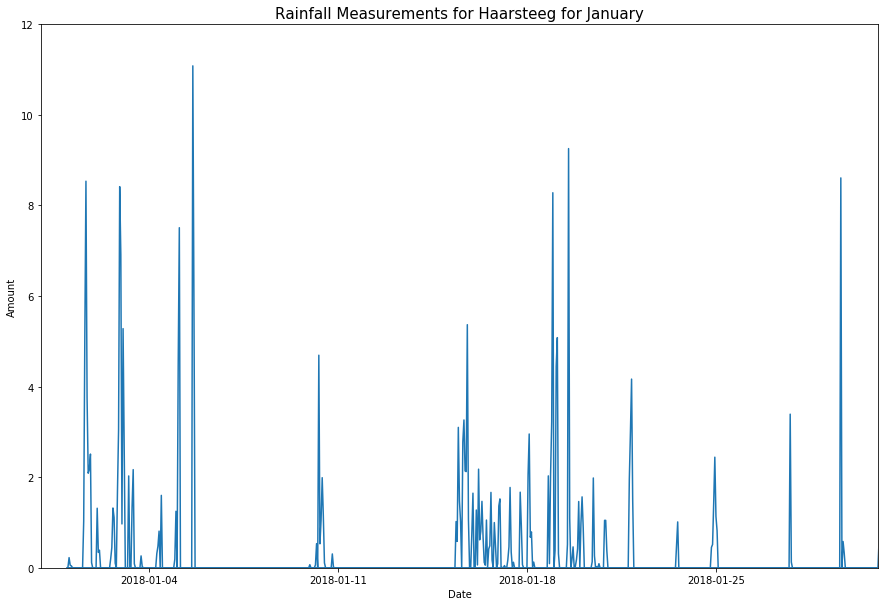

In [10]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.plot(all_areas2['Begin'], all_areas2['Haarsteeg'])
ax1.set_xlim([datetime.date(2017, 12, 31), datetime.date(2018, 1, 31)])
ax1.set_ylim(0,12)

plt.title('Rainfall Measurements for Haarsteeg for January', fontsize = 15)
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Amount', fontsize = 10);

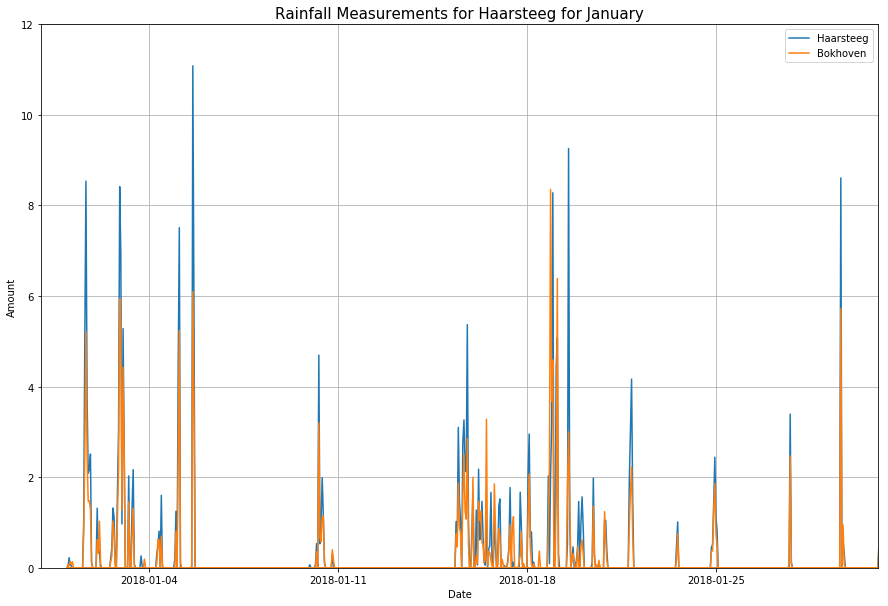

In [11]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.plot(all_areas2['Begin'], all_areas2['Haarsteeg'], label = 'Haarsteeg')
ax1.plot(all_areas2['Begin'], all_areas2['Bokhoven'], label = 'Bokhoven')

ax1.set_xlim([datetime.date(2017, 12, 31), datetime.date(2018, 1, 31)])
ax1.set_ylim(0,12)

plt.title('Rainfall Measurements for Haarsteeg for January', fontsize = 15)
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Amount', fontsize = 10)
plt.legend()
plt.grid();

C:\Users\maren\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


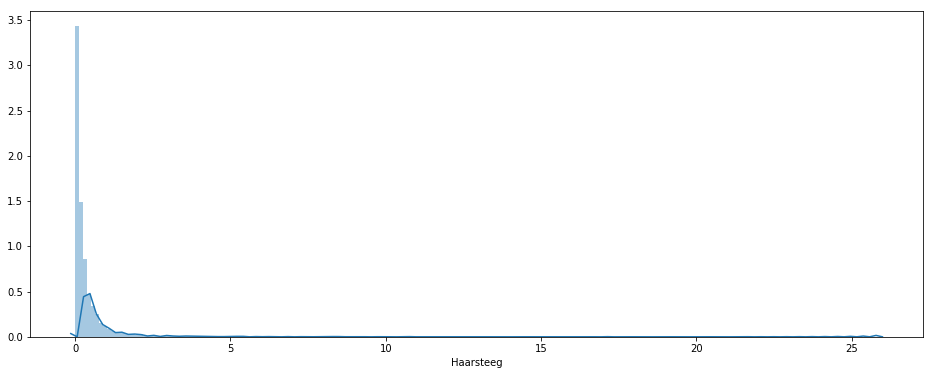

In [12]:
#Distribution of rainfall amount
plt.figure(figsize=(16, 6))
sns.distplot(all_areas2[all_areas2['Haarsteeg']!=0]['Haarsteeg'], bins = 200);

In [13]:
#Descriptive statistics
rain_Haar = all_areas2[all_areas2['Haarsteeg'] > 0.263875]
rain_Haar.describe()

,Haarsteeg,Bokhoven
count,2524.000000,2524.000000
mean,1.028796,0.629220
std,1.648399,1.101821
min,0.263900,0.000000
25%,0.365975,0.181475
50%,0.548000,0.319550
75%,0.962750,0.621300
max,25.848700,13.519400


## RG8180 && RG8170

Example: 
RG8180_flow = pd.concat([pd.read_csv(file,usecols=["datumBeginMeting","hstWaarde"],header = 0,index_col= 0,parse_dates=[1,2],infer_datetime_format=True) for file in glob.glob(path_8180_flow+"/*.*")], ignore_index = True)

### Warning: path in path list has been modified
### Useless columns in RG dataframe are removed e.g. endtime, pump name

In [14]:
#this requires you to download the pickle files from the drive and save them in the data/combined_data folder
combined_rain_pump = pd.read_pickle("../data/combined_data/"+"combined_rain_pump_1hour.pickle")
combined_rain_pump.head()

,Haarsteeg,Bokhoven,RG8180_flow,RG8180_level,RG8170_flow,RG8170_level
datumBeginMeting,,,,,,
2017-12-31 23:00:00,0.0000,0.0000,NaN,NaN,NaN,NaN
2018-01-01 00:00:00,0.0124,0.0583,1200.0,61.7,219439.2,-18.5
2018-01-01 01:00:00,0.2245,0.0448,940.0,22.6,201402.8,-50.8
2018-01-01 02:00:00,0.0563,0.1409,0.0,9.6,165302.9,-71.9
2018-01-01 03:00:00,0.0427,0.0714,280.0,3.7,143666.6,-76.4


In [15]:
#The following cells are commented out because using the pickle file works instead

# # collect CSV

# RG8180_flow = pd.concat([pd.read_csv(file,usecols=["datumBeginMeting","hstWaarde"],header = 0,parse_dates=[0],infer_datetime_format=True, encoding = "ISO-8859-1") for file in glob.glob(path_8180_flow+"/*.*")], ignore_index = True)
# RG8180_level = pd.concat([pd.read_csv(file,usecols=["datumBeginMeting","hstWaarde"],header = 0,parse_dates=[0],infer_datetime_format=True, encoding = "ISO-8859-1") for file in glob.glob(path_8180_level+"/*.*")], ignore_index = True)
# RG8170_flow = pd.concat([pd.read_csv(file,usecols=["datumBeginMeting","hstWaarde"],header = 0,parse_dates=[0],infer_datetime_format=True, encoding = "ISO-8859-1") for file in glob.glob(path_8170_flow+"/*.*")], ignore_index = True)
# RG8170_level = pd.concat([pd.read_csv(file,usecols=["datumBeginMeting","hstWaarde"],header = 0,parse_dates=[0],infer_datetime_format=True, encoding = "ISO-8859-1") for file in glob.glob(path_8170_level+"/*.*")], ignore_index = True)

# # save the csv but you can't save your love
# '''
# RG8180_flow.to_csv("../data/combined_data/"+"RG8180_flow.pickle")
# RG8180_level.to_csv("../data/combined_data/"+"RG8180_level.pickle")
# RG8170_flow.to_csv("../data/combined_data/"+"RG8170_flow.pickle")
# RG8170_level.to_csv("../data/combined_data/"+"RG8170_level.pickle")
# ''';

In [16]:
# RG8170_level.head()

In [17]:
# # convert into 5 mins interval
# RG8180_flow_5min = RG8180_flow.set_index("datumBeginMeting").sort_values(by="datumBeginMeting").rename(columns={"hstWaarde":"RG8180_flow"}).resample("5Min").sum()
# RG8180_level_5min = RG8180_level.set_index("datumBeginMeting").sort_values(by="datumBeginMeting").rename(columns={"hstWaarde":"RG8180_level"}).resample("5Min").sum()
# RG8170_flow_5min = RG8170_flow.set_index("datumBeginMeting").sort_values(by="datumBeginMeting").rename(columns={"hstWaarde":"RG8170_flow"}).resample("5Min").sum()
# RG8170_level_5min = RG8170_level.set_index("datumBeginMeting").sort_values(by="datumBeginMeting").rename(columns={"hstWaarde":"RG8170_level"}).resample("5Min").sum()

In [18]:
# RG8180_level_5min.plot()

In [19]:
# all_areas2.head()

In [20]:
# rain = all_areas2.drop("End",axis=1).rename(columns={"Begin":"datumBeginMeting"}).set_index("datumBeginMeting")

In [21]:
# rain.head()

In [22]:
# combined_rain_pump = rain.join([RG8180_flow_5min,RG8180_level_5min,RG8170_flow_5min,RG8170_level_5min])
# combined_rain_pump

# Visualizing rainfall vs pump activity

In [23]:
combined_rain_pump.head()

,Haarsteeg,Bokhoven,RG8180_flow,RG8180_level,RG8170_flow,RG8170_level
datumBeginMeting,,,,,,
2017-12-31 23:00:00,0.0000,0.0000,NaN,NaN,NaN,NaN
2018-01-01 00:00:00,0.0124,0.0583,1200.0,61.7,219439.2,-18.5
2018-01-01 01:00:00,0.2245,0.0448,940.0,22.6,201402.8,-50.8
2018-01-01 02:00:00,0.0563,0.1409,0.0,9.6,165302.9,-71.9
2018-01-01 03:00:00,0.0427,0.0714,280.0,3.7,143666.6,-76.4


In [24]:
combined_rain_pump['RG8170_level'].describe()

count    13846.000000
mean      -117.250137
std         27.935937
min       -260.500000
25%       -128.400000
50%       -125.000000
75%       -120.900000
max         54.000000
Name: RG8170_level, dtype: float64

In [25]:
combined_rain_pump.index

DatetimeIndex(['2017-12-31 23:00:00', '2018-01-01 00:00:00',
               '2018-01-01 01:00:00', '2018-01-01 02:00:00',
               '2018-01-01 03:00:00', '2018-01-01 04:00:00',
               '2018-01-01 05:00:00', '2018-01-01 06:00:00',
               '2018-01-01 07:00:00', '2018-01-01 08:00:00',
               ...
               '2019-07-31 12:00:00', '2019-07-31 13:00:00',
               '2019-07-31 14:00:00', '2019-07-31 15:00:00',
               '2019-07-31 16:00:00', '2019-07-31 17:00:00',
               '2019-07-31 18:00:00', '2019-07-31 19:00:00',
               '2019-07-31 20:00:00', '2019-07-31 21:00:00'],
              dtype='datetime64[ns]', name='datumBeginMeting', length=13847, freq='60T')

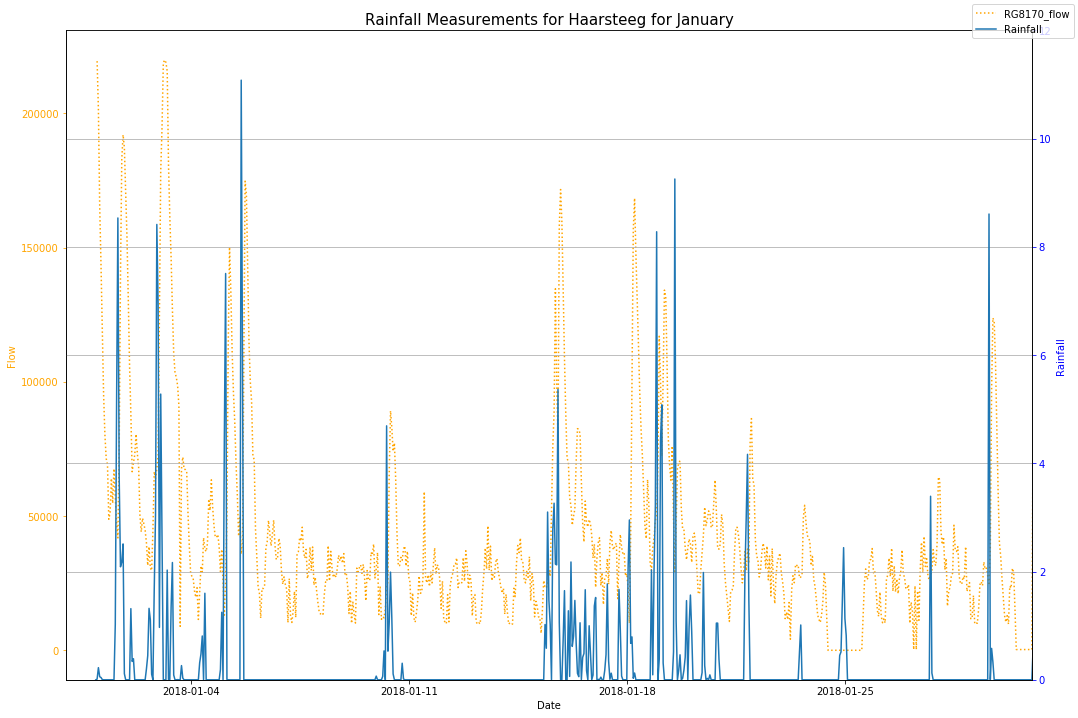

In [26]:
#Visualization for Haarsteeg and its pump
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)




ax1.plot(combined_rain_pump.index, combined_rain_pump['RG8170_flow'], label = 'RG8170_flow', color = 'orange', linestyle = 'dotted')
ax1.set_ylabel('Flow', color='orange', fontsize = 10)
#ax2.set_ylim(0,20000)
ax1.tick_params('y', colors='orange')
ax1.set_xlabel('Date', fontsize = 10)


ax2 = ax1.twinx()
ax2.plot(combined_rain_pump.index, combined_rain_pump['Haarsteeg'], label = 'Rainfall')
#ax1.plot(combined_rain_pump.index, combined_rain_pump['RG8170_flow'], label = 'RG8170_flow')

ax2.set_xlim([datetime.date(2017, 12, 31), datetime.date(2018, 1, 31)])
ax2.set_ylabel('Rainfall', color = 'blue', fontsize = 10)
ax2.tick_params('y', colors='b')
ax2.set_ylim(0,12)

plt.title('Rainfall Measurements for Haarsteeg for January', fontsize = 15)
fig.legend()
plt.grid()

fig.tight_layout()
#plt.show()
plt.savefig("../graphs/"+"Haar_flow_Jan.png");

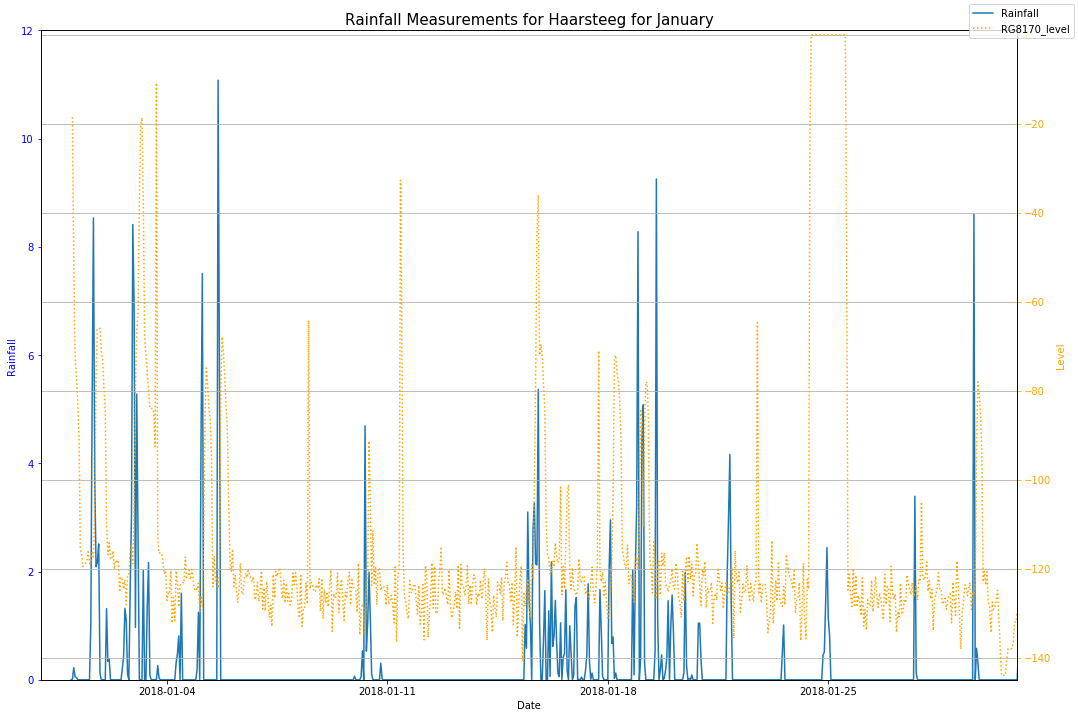

In [27]:
#Visualization for Haarsteeg and its pump
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.plot(combined_rain_pump.index, combined_rain_pump['Haarsteeg'], label = 'Rainfall')
#ax1.plot(combined_rain_pump.index, combined_rain_pump['RG8170_flow'], label = 'RG8170_flow')

ax1.set_xlim([datetime.date(2017, 12, 31), datetime.date(2018, 1, 31)])
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Rainfall', color = 'blue', fontsize = 10)
ax1.tick_params('y', colors='b')
ax1.set_ylim(0,12)


ax2 = ax1.twinx()
ax2.plot(combined_rain_pump.index, combined_rain_pump['RG8170_level'], label = 'RG8170_level', color = 'orange', linestyle = 'dotted')
ax2.set_ylabel('Level', color='orange', fontsize = 10)
ax2.set_ylim((-145, 1))
ax2.tick_params('y', colors='orange')

plt.title('Rainfall Measurements for Haarsteeg for January', fontsize = 15)
fig.legend()
plt.grid()

fig.tight_layout()
plt.savefig("../graphs/"+"Haar_level_Jan.png");

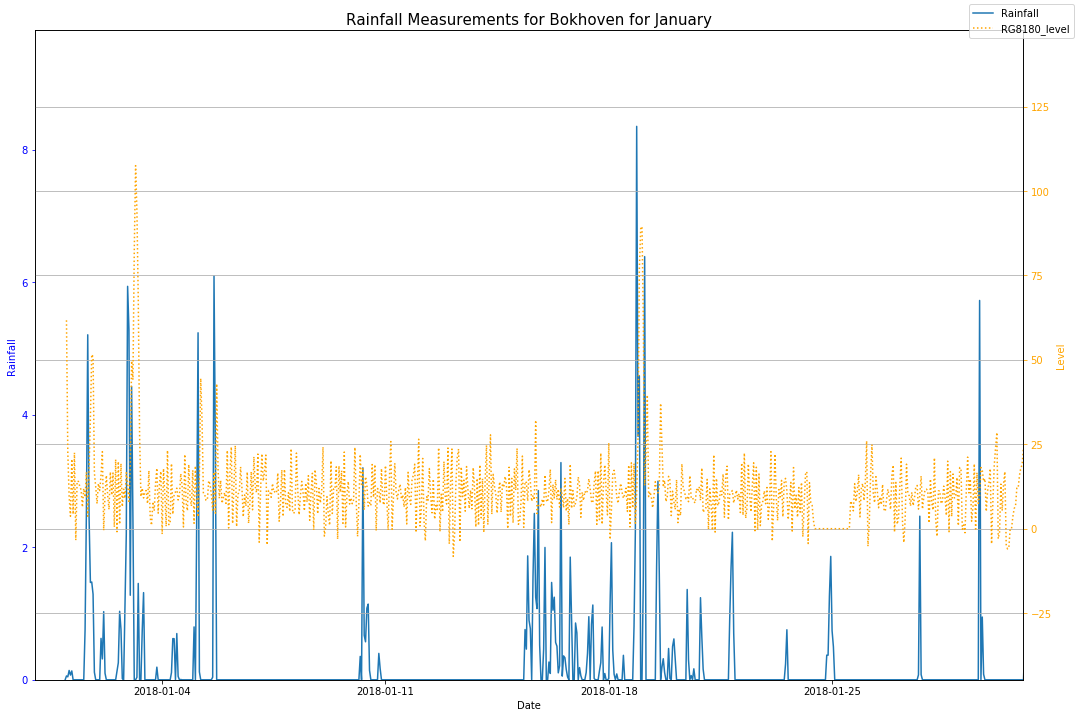

In [28]:
#Visualization for Haarsteeg and its pump
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.plot(combined_rain_pump.index, combined_rain_pump['Bokhoven'], label = 'Rainfall')
#ax1.plot(combined_rain_pump.index, combined_rain_pump['RG8170_flow'], label = 'RG8170_flow')

ax1.set_xlim([datetime.date(2017, 12, 31), datetime.date(2018, 1, 31)])
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Rainfall', color = 'blue', fontsize = 10)
ax1.tick_params('y', colors='b')
ax1.set_ylim(0,9.8)


ax2 = ax1.twinx()
ax2.plot(combined_rain_pump.index, combined_rain_pump['RG8180_level'], label = 'RG8180_level', color = 'orange', linestyle = 'dotted')
ax2.set_ylabel('Level', color='orange', fontsize = 10)
#ax2.set_ylim((-1, 9.8))
ax2.tick_params('y', colors='orange')

plt.title('Rainfall Measurements for Bokhoven for January', fontsize = 15)
fig.legend()
plt.grid()

fig.tight_layout()
plt.savefig("../graphs/"+"Bok_level_Jan.png");

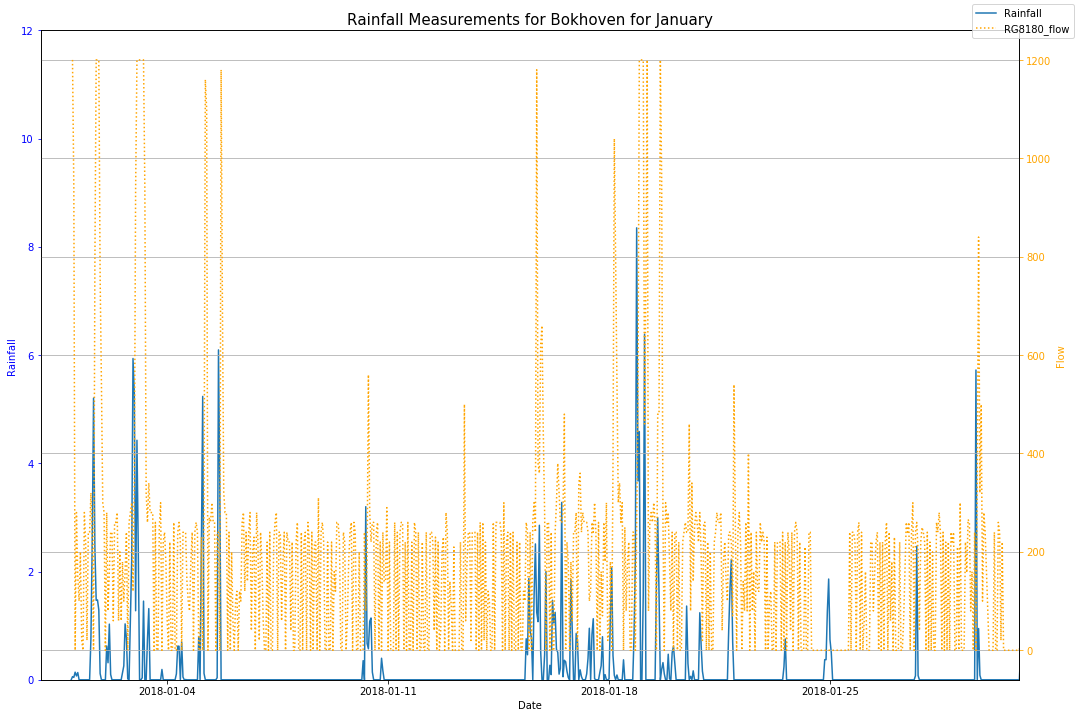

In [29]:
#Visualization for Haarsteeg and its pump
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.plot(combined_rain_pump.index, combined_rain_pump['Bokhoven'], label = 'Rainfall')
#ax1.plot(combined_rain_pump.index, combined_rain_pump['RG8170_flow'], label = 'RG8170_flow')

ax1.set_xlim([datetime.date(2017, 12, 31), datetime.date(2018, 1, 31)])
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Rainfall', color = 'blue', fontsize = 10)
ax1.tick_params('y', colors='b')
ax1.set_ylim(0,12)


ax2 = ax1.twinx()
ax2.plot(combined_rain_pump.index, combined_rain_pump['RG8180_flow'], label = 'RG8180_flow', color = 'orange', linestyle = 'dotted')
ax2.set_ylabel('Flow', color='orange', fontsize = 10)
#ax2.set_ylim(0,110)
ax2.tick_params('y', colors='orange')

plt.title('Rainfall Measurements for Bokhoven for January', fontsize = 15)
fig.legend()
plt.grid()

fig.tight_layout()
#plt.show()
plt.savefig("../graphs/"+"Bok_flow_Jan.png");

# How long does it take for flow to return to dry weather state after rainfall?

In [30]:
january = combined_rain_pump[:746] #took a minute of trial and error

In [31]:
january.describe()

,Haarsteeg,Bokhoven,RG8180_flow,RG8180_level,RG8170_flow,RG8170_level
count,746.000000,746.000000,745.000000,745.000000,745.000000,745.000000
mean,0.367712,0.261035,198.259866,11.756107,44687.831678,-113.461611
std,1.207014,0.849885,238.156770,11.572225,39854.685614,28.850168
min,0.000000,0.000000,0.000000,-8.200000,0.000000,-144.000000
25%,0.000000,0.000000,0.000000,5.700000,23288.900000,-126.800000
50%,0.000000,0.000000,220.000000,10.300000,32200.100000,-123.200000
75%,0.000000,0.000000,260.000000,15.700000,48810.800000,-118.300000
max,11.080500,8.352000,1200.000000,107.500000,219897.700000,0.000000


In [32]:
dry_Bok = january[january['Bokhoven'] == 0]

In [33]:
dry_Bok_pump_on = dry_Bok[dry_Bok['RG8180_flow'] > 0]

In [34]:
dry_Bok_pump_on.describe() 

,Haarsteeg,Bokhoven,RG8180_flow,RG8180_level,RG8170_flow,RG8170_level
count,374.000000,374.0,374.000000,374.000000,374.000000,374.000000
mean,0.005409,0.0,252.650802,11.591176,45710.440374,-118.221925
std,0.035427,0.0,183.238814,11.140620,35627.377039,16.948721
min,0.000000,0.0,20.000000,-5.200000,276.000000,-140.700000
25%,0.000000,0.0,220.000000,6.500000,26361.100000,-126.500000
50%,0.000000,0.0,240.000000,10.600000,34341.300000,-123.250000
75%,0.000000,0.0,260.000000,14.300000,46569.725000,-119.650000
max,0.383000,0.0,1200.000000,107.500000,219897.700000,-20.000000


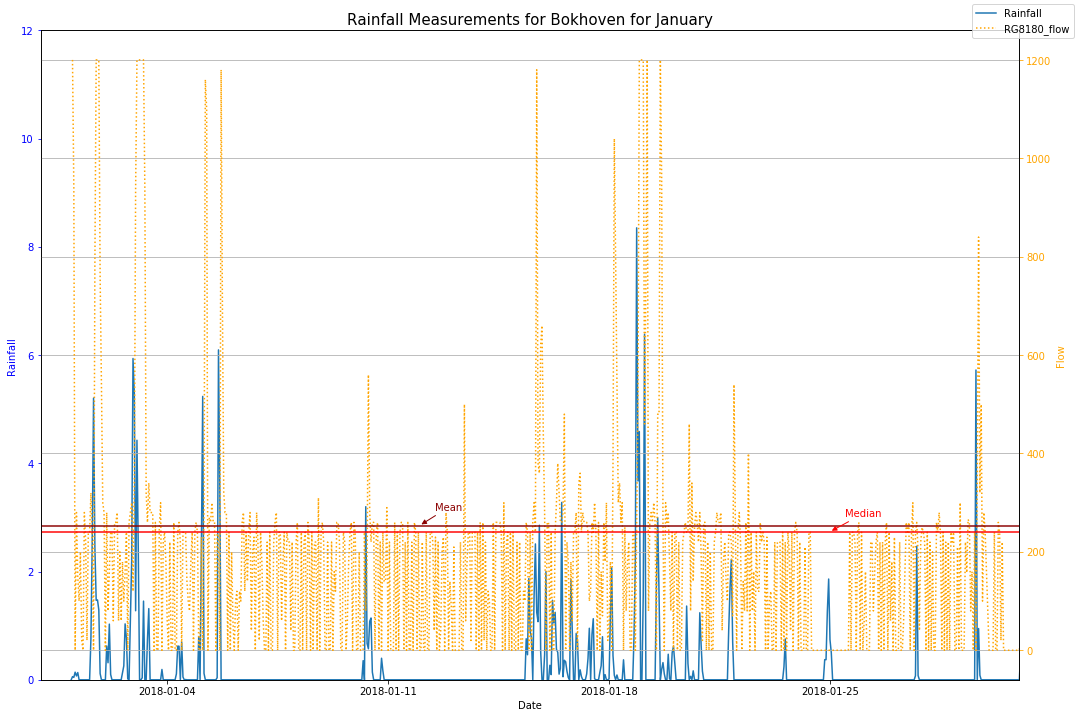

In [35]:
#Investigate whether median or mean represent the dry weather flow better

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.plot(combined_rain_pump.index, combined_rain_pump['Bokhoven'], label = 'Rainfall')
#ax1.plot(combined_rain_pump.index, combined_rain_pump['RG8170_flow'], label = 'RG8170_flow')

ax1.set_xlim([datetime.date(2017, 12, 31), datetime.date(2018, 1, 31)])
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Rainfall', color = 'blue', fontsize = 10)
ax1.tick_params('y', colors='b')
ax1.set_ylim(0,12)


ax2 = ax1.twinx()
ax2.plot(combined_rain_pump.index, combined_rain_pump['RG8180_flow'], label = 'RG8180_flow', color = 'orange', linestyle = 'dotted')
ax2.set_ylabel('Flow', color='orange', fontsize = 10)
#ax2.set_ylim(0,110)
ax2.tick_params('y', colors='orange')
ax2.axhline(252.650802, alpha = 6, color = 'darkred')
ax2.axhline(240, alpha = 6, color = 'red')

ax2.annotate('Mean', (mdates.date2num(datetime.date(2018, 1, 12)), 253.650802), xytext=(15, 15), 
            textcoords='offset points', arrowprops=dict(color='darkred', arrowstyle='-|>'), color = 'darkred')

ax2.annotate('Median', (mdates.date2num(datetime.date(2018, 1, 25)), 241), xytext=(15, 15), 
            textcoords='offset points', arrowprops=dict(color='red', arrowstyle='-|>'), color = 'red')

plt.title('Rainfall Measurements for Bokhoven for January', fontsize = 15)
fig.legend()
plt.grid()

fig.tight_layout()
plt.show();

In [36]:
'''From the plot it seems like the Mean describes the dry weather flow a bit better than the median, 
so I'll procede with 252.65 as the typical dry day flow value'''

january_bydays = january.resample("D").mean()
january_bydays['dry'] = january_bydays[january_bydays['Bokhoven'] == 0]['RG8180_flow']
january_bydays['rainy'] = january_bydays[january_bydays['Bokhoven'] > 0]['RG8180_flow']

In [37]:
january_bydays[['dry','rainy']]

,dry,rainy
datumBeginMeting,,
2017-12-31,NaN,NaN
2018-01-01,NaN,433.750000
2018-01-02,NaN,185.000000
2018-01-03,NaN,512.083333
2018-01-04,NaN,144.166667
2018-01-05,NaN,316.666667
2018-01-06,145.416667,NaN
2018-01-07,140.000000,NaN
2018-01-08,140.416667,NaN


In [38]:
rainy = combined_rain_pump.loc[:datetime.date(2018, 1, 6)]
dry = combined_rain_pump.loc[datetime.date(2018, 1, 6):datetime.date(2018, 1, 15)]

In [66]:
weather_change = combined_rain_pump.loc[:datetime.date(2018, 1, 31)]
weather_change['dry'] = weather_change[weather_change['Bokhoven']< 0.05]['RG8180_flow']
weather_change['rainy'] = weather_change[weather_change['Bokhoven']> 0.05]['RG8180_flow']

In [63]:
#len(weather_change.loc[:datetime.date(2018, 1, 11)])
weather_change.index[238]

Timestamp('2018-01-10 21:00:00', freq='60T')

In [80]:
weather_change.loc[datetime.date(2018, 1, 10):datetime.date(2018, 1, 15)]

,Haarsteeg,Bokhoven,RG8180_flow,RG8180_level,RG8170_flow,RG8170_level,dry,rainy
datumBeginMeting,,,,,,,,
2018-01-10 00:00:00,0.0000,0.0000,0.0,8.500000e+00,36416.1,-125.0,0.0,NaN
2018-01-10 01:00:00,0.0000,0.0000,0.0,2.410000e+01,13311.1,-129.8,0.0,NaN
2018-01-10 02:00:00,0.0000,0.0000,200.0,8.000000e+00,23553.5,-118.8,200.0,NaN
2018-01-10 03:00:00,0.0000,0.0000,0.0,-2.300000e+00,11544.5,-134.9,0.0,NaN
2018-01-10 04:00:00,0.0635,0.0000,0.0,7.500000e+00,12536.7,-129.4,0.0,NaN
2018-01-10 05:00:00,0.5339,0.3534,0.0,2.200000e+01,12087.9,-127.8,NaN,0.0
2018-01-10 06:00:00,0.0000,0.0000,240.0,1.310000e+01,15304.6,-128.2,240.0,NaN
2018-01-10 07:00:00,4.6930,3.1993,80.0,1.770000e+01,23204.2,-134.9,NaN,80.0
2018-01-10 08:00:00,0.5296,0.6714,180.0,5.600000e+00,25550.6,-125.3,NaN,180.0


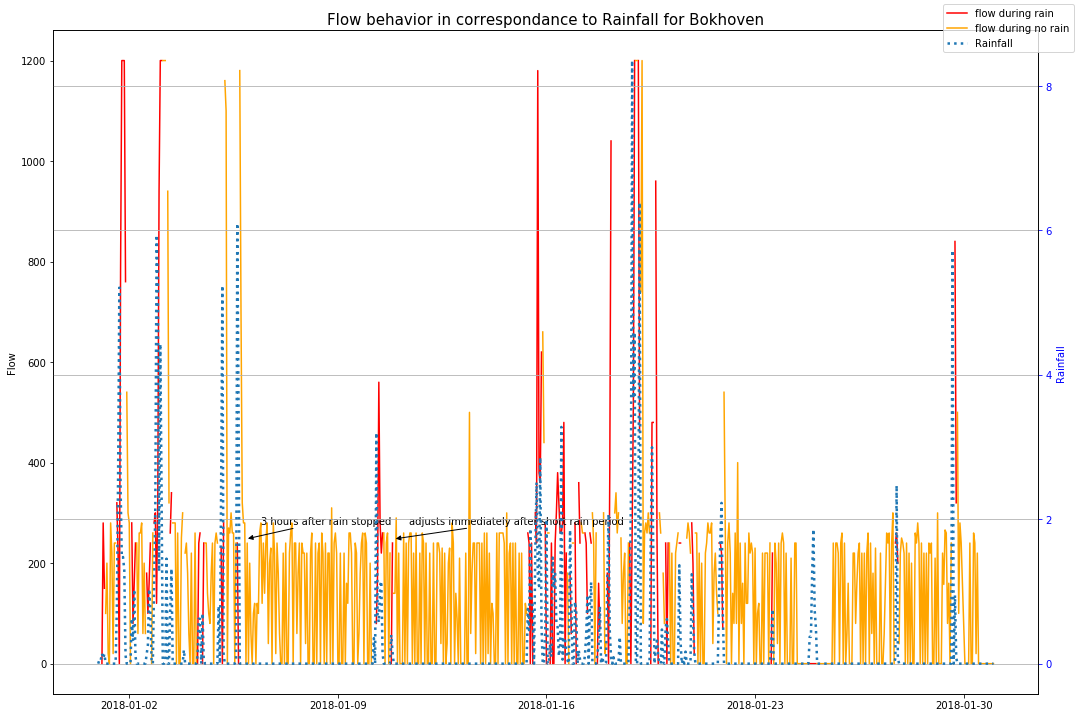

In [68]:
days = mdates.date2num((weather_change.index))

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.plot(weather_change.index, weather_change['rainy'], label = 'flow during rain', color='red', linewidth = 1.5)
ax1.plot(weather_change.index, weather_change['dry'], label = 'flow during no rain', color = 'orange', linewidth = 1.5)
ax1.set_ylabel('Flow', fontsize = 10)

ax2 = ax1.twinx()
ax2.plot(weather_change.index, weather_change['Bokhoven'], label = 'Rainfall', linestyle = 'dotted', linewidth = 2.5)
ax2.set_xlabel('Date', fontsize = 10)
ax2.set_ylabel('Rainfall', color = 'blue', fontsize = 10)
ax2.tick_params('y', colors='b')

#ax1.axvline(days[114], alpha = 6, color = 'black')
#ax1.axvline(days[117], alpha = 6, color = 'black')
#ax1.axhline(252.650802, alpha = 6, color = 'black')

ax1.annotate('3 hours after rain stopped', (days[119], 248), xytext=(15, 15), 
            textcoords='offset points', arrowprops=dict(color='black', arrowstyle='-|>'), color = 'black')
ax1.annotate('adjusts immediately after short rain period', (days[238], 248), xytext=(15, 15), 
            textcoords='offset points', arrowprops=dict(color='black', arrowstyle='-|>'), color = 'black')

plt.title('Flow behavior in correspondance to Rainfall for Bokhoven', fontsize = 15)
plt.grid()
fig.legend()
fig.tight_layout();
fig.savefig("../graphs/"+"FlowBehavior.png")

# Rainy weather flow vs. dry weather flow

In [43]:
rain = combined_rain_pump[combined_rain_pump['Haarsteeg'] > 0]['RG8170_flow']
dry = combined_rain_pump[combined_rain_pump['Haarsteeg'] == 0]['RG8170_flow']

len(rain), len(dry)

(1709, 12138)

In [44]:
rain

datumBeginMeting
2018-01-01 00:00:00    219439.2
2018-01-01 01:00:00    201402.8
2018-01-01 02:00:00    165302.9
2018-01-01 03:00:00    143666.6
2018-01-01 04:00:00    118481.8
2018-01-01 14:00:00     56925.3
2018-01-01 15:00:00     47786.3
2018-01-01 16:00:00     41839.5
2018-01-01 17:00:00     75554.6
2018-01-01 18:00:00    139174.6
2018-01-01 19:00:00    182891.2
2018-01-01 20:00:00    191990.9
2018-01-01 21:00:00    187252.8
2018-01-02 02:00:00     88042.7
2018-01-02 03:00:00     66511.2
2018-01-02 04:00:00     69910.8
2018-01-02 14:00:00     40008.3
2018-01-02 15:00:00     31631.0
2018-01-02 16:00:00     38565.6
2018-01-02 17:00:00     30665.7
2018-01-02 18:00:00     29712.1
2018-01-02 20:00:00     66513.1
2018-01-02 21:00:00     64020.6
2018-01-02 22:00:00     67612.2
2018-01-02 23:00:00     72586.3
2018-01-03 00:00:00    124401.0
2018-01-03 01:00:00    178438.4
2018-01-03 02:00:00    194620.0
2018-01-03 06:00:00    215670.8
2018-01-03 09:00:00    146206.6
                       

In [45]:
rain.mean(), dry.mean()

(54121.88437682856, 30128.523514872017)

In [46]:
rain.std(), dry.std()

(51004.21265683398, 30573.98821436336)

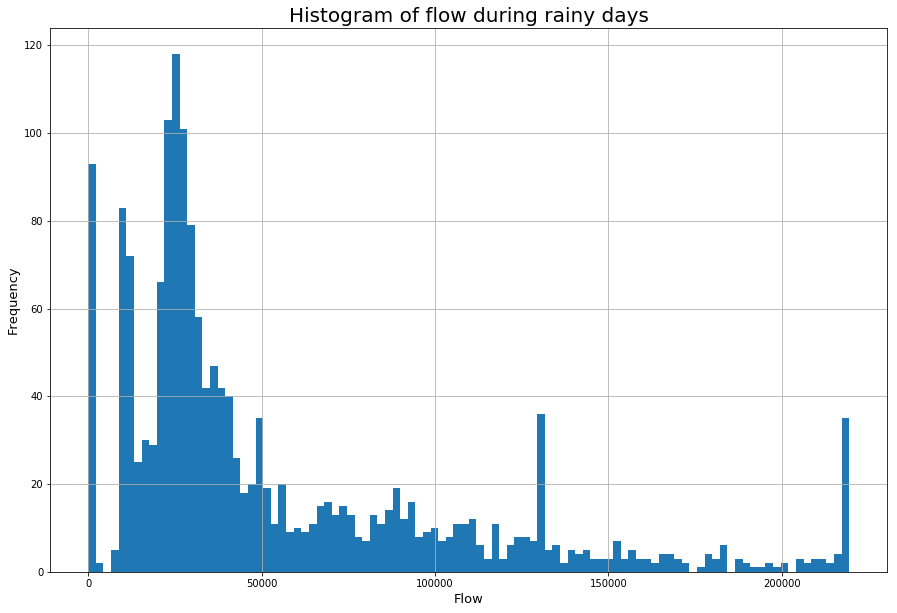

In [47]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

rain.hist(bins=100)
#sns.distplot(rain, bins=100)
ax1.set_xlabel('Flow', fontsize = 13) 
ax1.set_ylabel('Frequency', fontsize = 13)
ax1.set_title('Histogram of flow during rainy days', fontsize = 20) ;

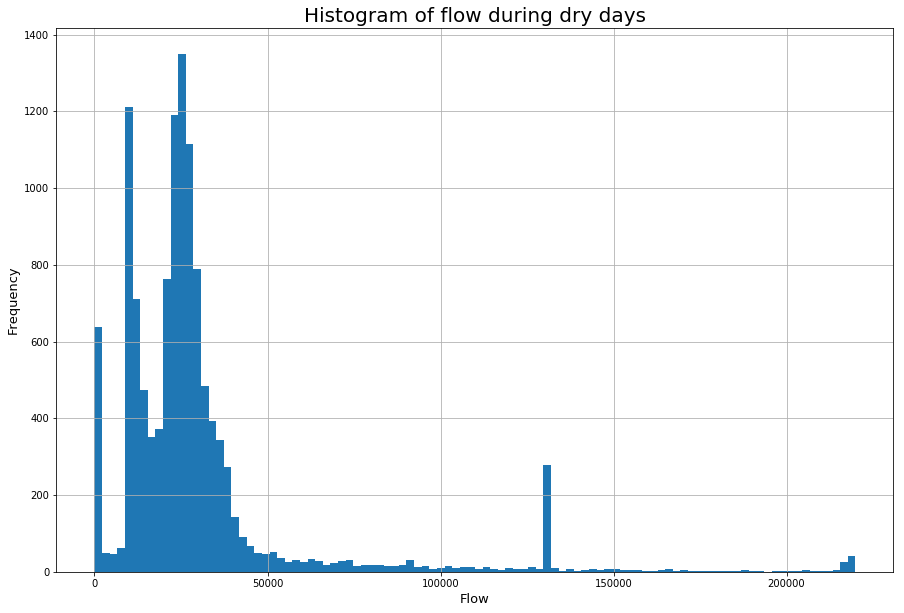

In [48]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

dry.hist(bins=100)
#sns.distplot(dry)
ax1.set_xlabel('Flow', fontsize = 13) 
ax1.set_ylabel('Frequency', fontsize = 13)
ax1.set_title('Histogram of flow during dry days', fontsize = 20) ;

In [49]:
rain_year = combined_rain_pump[combined_rain_pump['Haarsteeg'] > 0]
dry_year = combined_rain_pump[combined_rain_pump['Haarsteeg'] == 0]

rain_acc = rain_year.resample("D").mean()
dry_acc = dry_year.resample("D").mean()

In [50]:
rain_acc_M = rain_acc.resample('M').mean()
dry_acc_M = dry_acc.resample('M').mean()

In [51]:
#add the standarddeviations to the differences
deviations = pd.DataFrame((rain_year.resample("D").std()['RG8170_flow'] + dry_year.resample("D").std()['RG8170_flow']) / 2)
deviations.head()

,RG8170_flow
datumBeginMeting,
2017-12-31,NaN
2018-01-01,51753.316345
2018-01-02,23810.349513
2018-01-03,64592.017697
2018-01-04,9821.700583


In [52]:
dry_acc.head()

,Haarsteeg,Bokhoven,RG8180_flow,RG8180_level,RG8170_flow,RG8170_level
datumBeginMeting,,,,,,
2017-12-31,0.0,0.000000,NaN,NaN,NaN,NaN
2018-01-01,0.0,0.000000,196.363636,10.327273,84294.990909,-107.045455
2018-01-02,0.0,0.008225,183.333333,11.833333,67654.166667,-113.233333
2018-01-03,0.0,0.003142,551.666667,32.641667,126708.858333,-79.500000
2018-01-04,0.0,0.002979,143.157895,9.552632,37690.594737,-123.952632


In [53]:
diff = pd.DataFrame(rain_acc_M['RG8170_flow'] - dry_acc_M['RG8170_flow'])

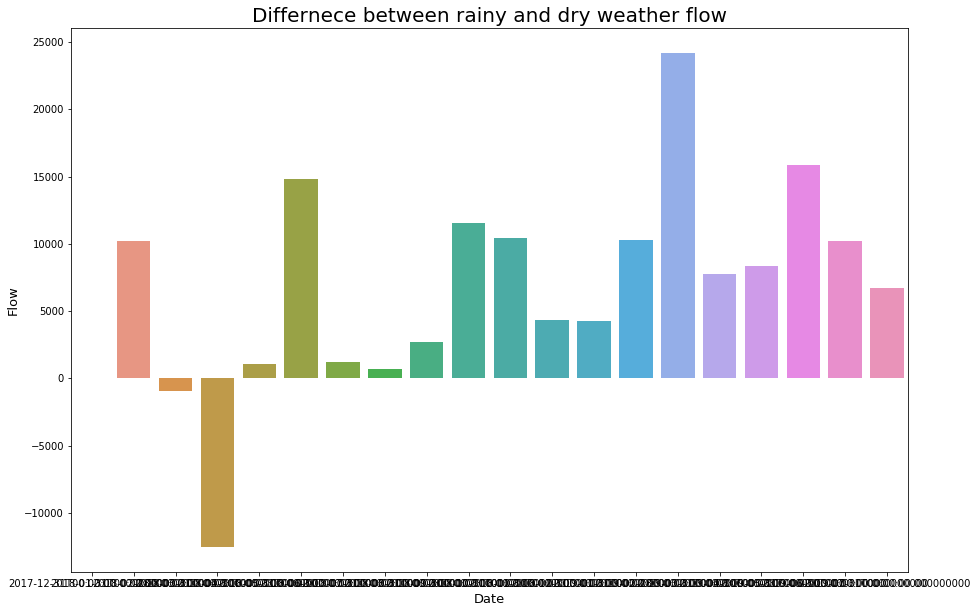

In [54]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

sns.barplot(diff.index, diff['RG8170_flow'], errwidth= .7)
#sns.distplot(dry)
ax1.set_xlabel('Date', fontsize = 13) 
ax1.set_ylabel('Flow', fontsize = 13)
ax1.set_title('Differnece between rainy and dry weather flow', fontsize = 20) ;



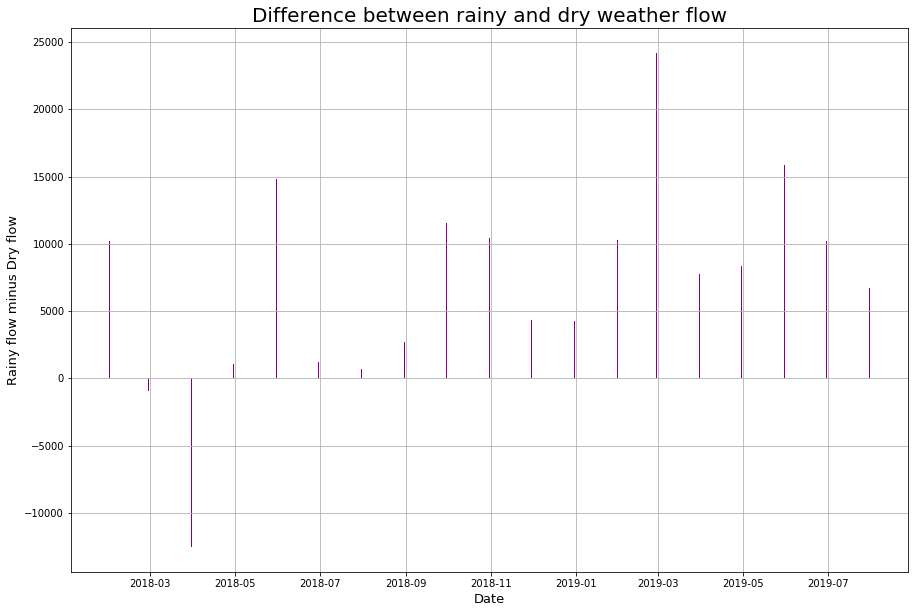

In [55]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.bar(diff.index, diff['RG8170_flow'], color = 'purple')

#ax1.fill_between(diff.index, diff['RG8170_flow'], deviations['RG8170_flow'], color = 'lightgrey')
#ax1.fill_between(diff.index, diff['RG8170_flow'], deviations['RG8170_flow'] * (-1), color = 'lightgrey')



#sns.distplot(dry)
ax1.set_xlabel('Date', fontsize = 13) 
ax1.set_ylabel('Rainy flow minus Dry flow', fontsize = 13)
ax1.set_title('Difference between rainy and dry weather flow', fontsize = 20) 
plt.grid()
fig.savefig("../graphs/"+"Weatherflowdiff.png");



# Visualization corrections

In [168]:
Bokhoven = pd.read_csv('../data/Bokhoven_rain.csv')
Bokhoven.tail()

,Unnamed: 0,datumBeginMeting,hstWaarde,Bokhoven,Begin,cumsum_previous_15,rain_-15_class
14395,14395,2019-08-23 19:00:00,0.0,0.0,2019-08-23 19:00:00,0.0,0
14396,14396,2019-08-23 20:00:00,240.0,0.0,2019-08-23 20:00:00,0.0,0
14397,14397,2019-08-23 21:00:00,0.0,0.0,2019-08-23 21:00:00,0.0,0
14398,14398,2019-08-23 22:00:00,220.0,0.0,2019-08-23 22:00:00,0.0,0
14399,14399,2019-08-23 23:00:00,40.0,0.0,2019-08-23 23:00:00,0.0,0


In [169]:
Bokhoven.drop('Unnamed: 0', axis=1, inplace=True) #drop the old indecies
Bokhoven['datumBeginMeting'] = pd.to_datetime(Bokhoven["datumBeginMeting"],format='%Y-%m-%d %H:%M:%S')
Bokhoven = Bokhoven.set_index('datumBeginMeting', inplace=False)

In [171]:
weather_change = Bokhoven.loc[:datetime.date(2018, 1, 31)] #entire january

weather_change['dry'] = weather_change[weather_change['rain_-15_class'] == 0]['hstWaarde']
weather_change['rainy'] = weather_change[weather_change['rain_-15_class'] == 1]['hstWaarde']

In [178]:
weather_change[weather_change['dry']>0]['dry'].mean(),weather_change[weather_change['dry']>0]['dry'].median()

(214.5951219512195, 220.0)

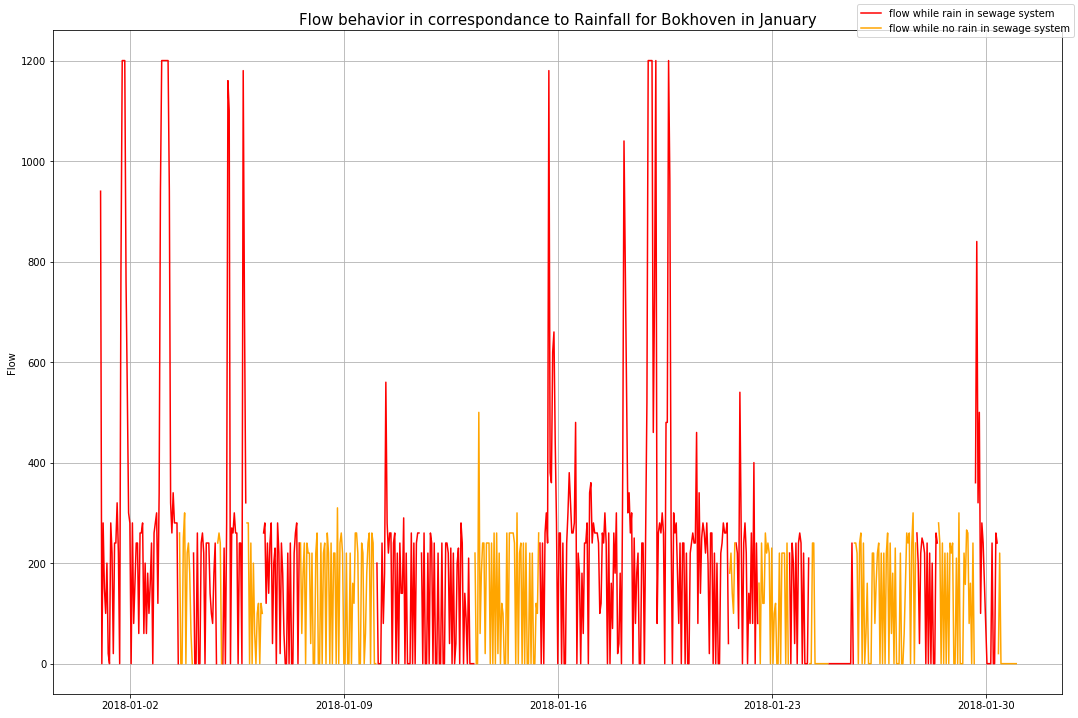

In [184]:
days = mdates.date2num((weather_change.index))

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.plot(weather_change.index, weather_change['rainy'], label = 'flow while rain in sewage system', color='red', linewidth = 1.5)
ax1.plot(weather_change.index, weather_change['dry'], label = 'flow while no rain in sewage system', color = 'orange', linewidth = 1.5)
ax1.set_ylabel('Flow', fontsize = 10)


plt.title('Flow behavior in correspondance to Rainfall for Bokhoven in January', fontsize = 15)
plt.grid()
fig.legend()
fig.tight_layout();
fig.savefig("../graphs/"+"FlowBehavior_new.png")